# Rough Clean Data

In [12]:
import pandas as pd

accident_df = pd.read_csv('../../FARS2020NationalCSV/accident.csv', encoding = 'ISO-8859-1')
person_df = pd.read_csv('../../FARS2020NationalCSV/person.csv', encoding = 'ISO-8859-1')

merge_df = pd.merge(accident_df, person_df, on = "ST_CASE", how = 'inner')


In [15]:
columns_to_keep = [
    # Driver-Specific Information
    'AGE', 'SEX', 'DRINKING', 'DRUGS', 'ALC_DET', 'ALC_STATUS', 
    'DRUG_DET', 'DSTATUS', 'INJ_SEV', 'PER_TYP', 'MAKE', 
    'MOD_YEAR', 'DAY_WEEK', 'HOUR_x', 'WEATHER', 'LGT_COND','STATE_x'
]

# Keeping only the selected columns and dropping the rest
merge_df = merge_df[columns_to_keep]


In [ ]:
output_file_path = 'Data/PCA_data.csv'
merge_df.to_csv(output_file_path)
output_file_path

# PCA

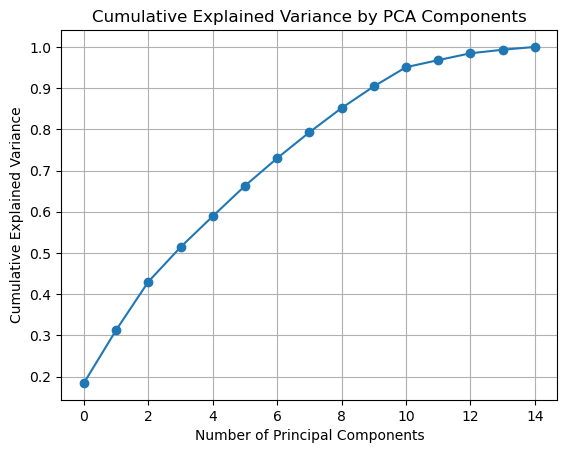

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

data = merge_df.drop(columns=['MAKE', 'MOD_YEAR'])
scaler = StandardScaler()
scaled_pca_data = scaler.fit_transform(data)

# Re-applying PCA
pca = PCA()
pca_transformed_data = pca.fit_transform(scaled_pca_data)

# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Displaying the first few principal components' explained variance
explained_variance_ratio, cumulative_explained_variance
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()



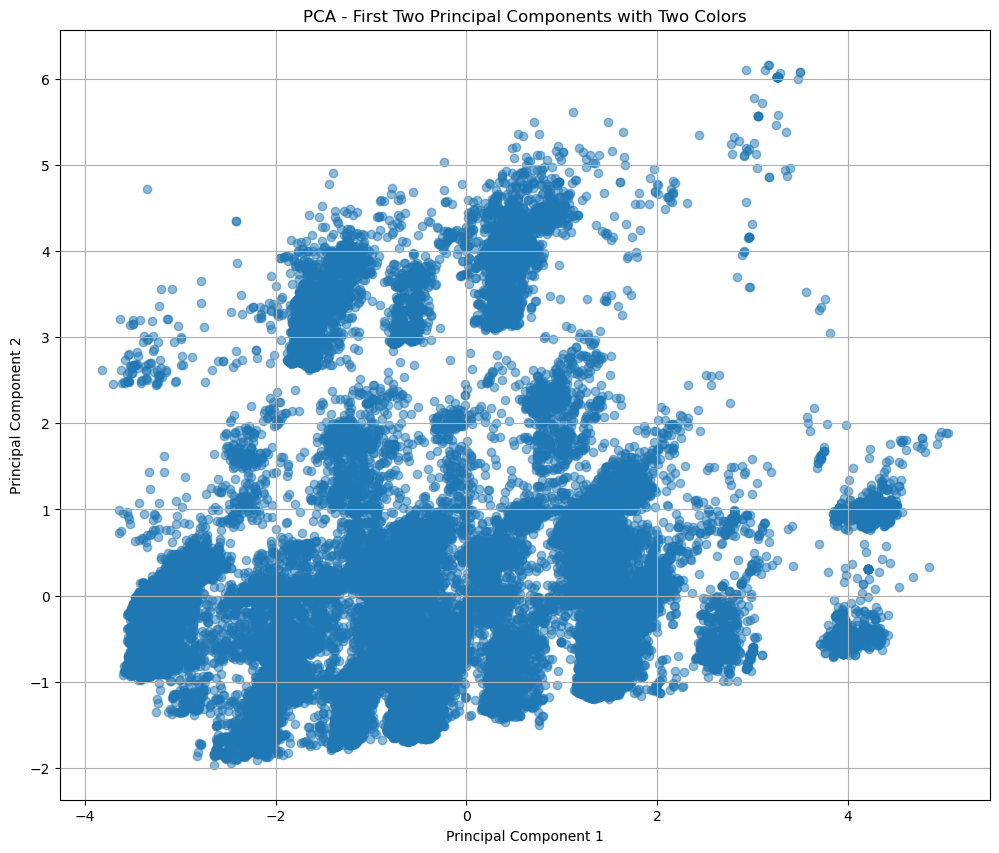

In [35]:
pc1 = pca_transformed_data[:, 0]  
pc2 = pca_transformed_data[:, 1]  


plt.figure(figsize=(12, 10))
plt.scatter(pc1, pc2, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components with Two Colors')
plt.grid(True)
plt.show()



There is no clear clustering of points, which suggests that there may not be distinct groups within the data based on these two principal components alone.

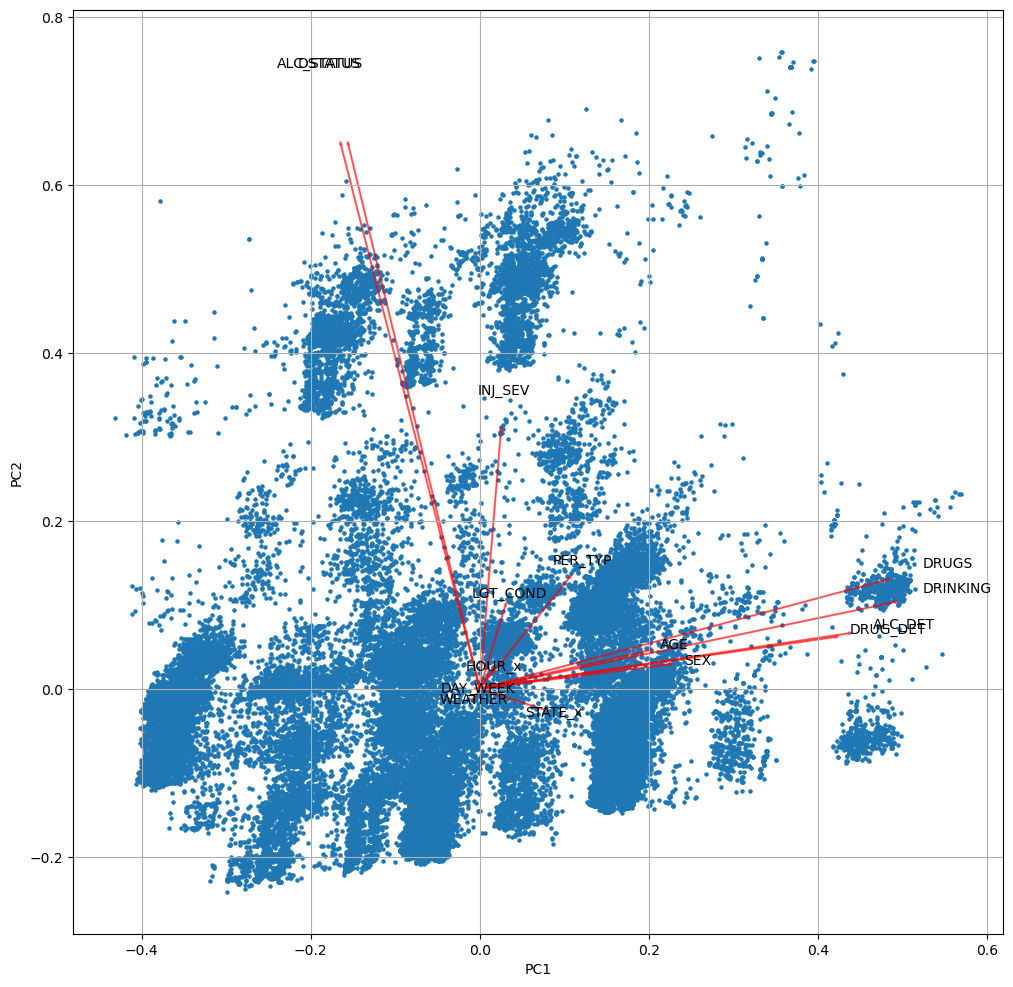

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    plt.scatter(xs * scalex, ys * scaley, s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='black', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='black', ha='center', va='center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# PCA scores (the transformed data points)
pca_scores = pca_transformed_data

# PCA loadings (the contributions of the original variables to the components)
pca_loadings = pca.components_

plt.figure(figsize=(12,12))
biplot(pca_scores, pca_loadings.transpose(), labels=data.columns)
plt.show()


Variables like Drinking, drugs, and drug detection, are pointing in a similar way, this suggests that they are positively correlated with each other and contribute similarly to these components. Based on their direction, these factors have more influence on PC 1 than it has on PC 2.

Sex and age are similar to drugs and drinking but with less influence than those components.

ALC_STATUS has a strong loading on PC2 and some level of loading on PC1, indicating that this variable significantly differentiates the data along PC 2. Injury severity has a notable contribution to both PC1 and PC2, but more on PC2. This might be interpreted as injury severity varying along with alcohol status but also related to the other factors that align with PC1.

The variables associated with substance use (DRINKING, DRUGS, DRUG_DET, ALC_STATUS) are significant in explaining the variance in the data. This suggests that substance use is a major factor in the nature and severity of crashes. So, no drugs, no drinking if you are going to drive.

The positioning of INJ_SEV could indicate that crashes involving substance use or certain demographics (SEX) may result in different injury severities. Other variables like WEATHER, LGT_COND (light conditions), and HOUR have smaller angles with each other, suggesting they are somewhat correlated and may jointly influence the conditions under which accidents occur.


# t-SNE